In [68]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()
x = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state = 666)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(x_train,y_train)
knn_clf.score(x_test,y_test)

0.9888888888888889

# 寻找最好得K

In [5]:
best_score = 0.0
besk_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(x_train,y_train)
    score = knn_clf.score(x_test,y_test)
    if score > best_score:
        besk_k = k
        best_score = score
print("besk_k=",besk_k)
print("besst_score=",best_score)

besk_k= 4
besst_score= 0.9916666666666667


### 如果得到的besk_k,在边界处，要对range()进行扩充

# 考虑距离，不考虑距离

In [10]:
best_method = " "
best_score = 0.0
besk_k = -1
for method in ["uniform", "distance"]:
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(x_train,y_train)
        score = knn_clf.score(x_test,y_test)
        if score > best_score:
            besk_k = k
            best_score = score
            best_method = method
print("best_method=",best_method)
print("besk_k=",besk_k)
print("besst_score=",best_score)


best_method= uniform
besk_k= 4
besst_score= 0.9916666666666667


# 搜索明可夫斯基距离相应得p

In [11]:
%%time
best_p = -1
best_score = 0.0
besk_k = -1
for k in range(1, 11):
    for p in range(1, 5):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
        knn_clf.fit(x_train,y_train)
        score = knn_clf.score(x_test,y_test)
        if score > best_score:
            besk_k = k
            best_score = score
            best_p = p
print("best_P=",best_p)
print("besk_k=",besk_k)
print("besst_score=",best_score)


best_P= 2
besk_k= 3
besst_score= 0.9888888888888889
Wall time: 13.1 s


# 网格搜索

## Grid Search

In [28]:
param_grid=[
    {
        "weights":["uniform"],
        "n_neighbors":[i for i in range(1, 11)]
    },
    {
         "weights":["distance"],
        "n_neighbors":[i for i in range(1,11)],
        "p":[i for i in range(1,5)]

    }
]

In [29]:
knn_clf = KNeighborsClassifier()

In [30]:
from sklearn.model_selection import GridSearchCV
gird_search = GridSearchCV(knn_clf,param_grid)

In [32]:
%%time
gird_search.fit(x_train,y_train)

Wall time: 47.6 s


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
gird_search.best_estimator_ 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [37]:
gird_search.best_score_ # 准确度

0.9860820751064653

In [39]:
gird_search.best_params_ # 最佳参数

{'n_neighbors': 1, 'weights': 'uniform'}

In [40]:
knn_clf = gird_search.best_estimator_

In [41]:
knn_clf.fit(x_train,y_train) # 拟合

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [42]:
knn_clf.score(x_test,y_test) # 最佳得分

0.9833333333333333

In [47]:
%%time
gird_search = GridSearchCV(knn_clf,param_grid,n_jobs=-1,verbose=2) 
# n_jobs=-1 所有核;verbose:整数值越大，输出得就越详细。

gird_search.fit(x_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s


Wall time: 10.6 s


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.5s finished


# 数据归一化（feature scaling）

### 最值归一化：把所有的数据映射到0-1之间
适用于分布有明显边界的情况，受outliner影响较大
- 学生分数，图像边界

### 均值方差归一化  standardization
适用在，数据分布么有明显的边界，有可能存在极端数据值

均值方差归一化：把所有的数据归一化到均值为0，方差为1 的分布中



In [49]:
# 最值归一化
x = np.random.randint(0,100,size=100)
x

array([50, 58, 82, 27, 24, 73, 93, 20, 48, 76, 10, 85, 74, 57, 11, 53, 78,
       93, 69, 62, 69, 83, 92, 69, 33, 93, 88, 89, 84, 31, 56, 50, 73, 10,
        1,  6, 14, 76, 91, 87, 28, 78, 92, 53, 76, 94, 37, 34, 70, 73, 91,
       95,  5, 99, 95, 29, 45,  8, 27, 75, 96, 10, 48, 48, 37, 24, 72,  3,
        4, 99, 66, 40,  0, 48, 55,  5, 35, 90, 47, 83, 46, 21, 56, 30, 33,
       81, 61, 77, 35, 61, 90, 18, 72, 89, 13, 29, 80, 33, 14,  7])

In [52]:
(x-np.min(x)) /  (np.max(x)-np.min(x))

array([0.50505051, 0.58585859, 0.82828283, 0.27272727, 0.24242424,
       0.73737374, 0.93939394, 0.2020202 , 0.48484848, 0.76767677,
       0.1010101 , 0.85858586, 0.74747475, 0.57575758, 0.11111111,
       0.53535354, 0.78787879, 0.93939394, 0.6969697 , 0.62626263,
       0.6969697 , 0.83838384, 0.92929293, 0.6969697 , 0.33333333,
       0.93939394, 0.88888889, 0.8989899 , 0.84848485, 0.31313131,
       0.56565657, 0.50505051, 0.73737374, 0.1010101 , 0.01010101,
       0.06060606, 0.14141414, 0.76767677, 0.91919192, 0.87878788,
       0.28282828, 0.78787879, 0.92929293, 0.53535354, 0.76767677,
       0.94949495, 0.37373737, 0.34343434, 0.70707071, 0.73737374,
       0.91919192, 0.95959596, 0.05050505, 1.        , 0.95959596,
       0.29292929, 0.45454545, 0.08080808, 0.27272727, 0.75757576,
       0.96969697, 0.1010101 , 0.48484848, 0.48484848, 0.37373737,
       0.24242424, 0.72727273, 0.03030303, 0.04040404, 1.        ,
       0.66666667, 0.4040404 , 0.        , 0.48484848, 0.55555

In [58]:
xx = np.random.randint(0,100,(50,2))
xx[:10,:]

array([[63,  1],
       [34,  6],
       [18, 36],
       [ 5, 67],
       [62, 11],
       [68, 25],
       [35, 89],
       [53,  4],
       [ 0,  1],
       [27, 39]])

In [59]:
xx = np.array(xx, dtype=float)

In [60]:
xx[:10]

array([[63.,  1.],
       [34.,  6.],
       [18., 36.],
       [ 5., 67.],
       [62., 11.],
       [68., 25.],
       [35., 89.],
       [53.,  4.],
       [ 0.,  1.],
       [27., 39.]])

In [65]:
xx[:,0] = (xx[:,0]-np.min(xx[:,0])) / (np.max(xx[:,0])-np.min(xx[:,0]))

In [66]:
xx[:,1] = (xx[:,1]-np.min(xx[:,1])) / (np.max(xx[:,1])-np.min(xx[:,1]))

In [67]:
xx[:10]

array([[0.63636364, 0.        ],
       [0.34343434, 0.05154639],
       [0.18181818, 0.36082474],
       [0.05050505, 0.68041237],
       [0.62626263, 0.10309278],
       [0.68686869, 0.24742268],
       [0.35353535, 0.90721649],
       [0.53535354, 0.03092784],
       [0.        , 0.        ],
       [0.27272727, 0.39175258]])

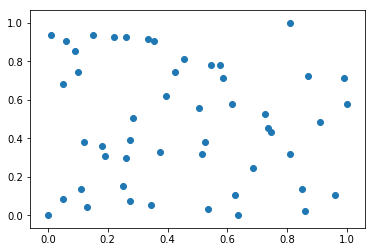

In [71]:
plt.scatter(xx[:,0],xx[:,1])
plt.show()

In [72]:
np.mean(xx[:,0]) #均值

0.44747474747474747

In [74]:
np.std(xx[:,0]) # 方差

0.2914854699744113

# 均值方差归一化

In [108]:
x2 = np.random.randint(0,100,(50,2))
x2 = np.array(x2, dtype=float)

In [109]:
x2[:,0] = (x[:,0]-np.mean(x2[:,0])) / np.std(x2[:,0])

In [110]:
x2[:,1] = (x[:,1]-np.mean(x2[:,1])) / np.std(x2[:,1])

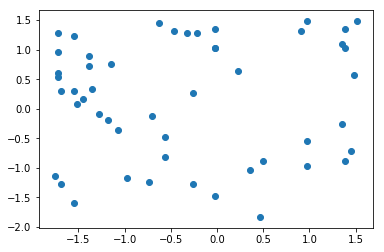

In [111]:
plt.scatter(x2[:,0],x2[:,1])
plt.show()

In [112]:
np.mean(x2[:,0])

-0.35155229849305153

In [113]:
np.std(x2[:,0])

1.105269864337401

In [114]:
np.mean(x2[:,1])

0.1548806844944413

In [115]:
np.std(x2[:,1])

0.9869719978720478